In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataPath = os.getcwd() + '/../data/atvi.csv'

In [3]:
df = pd.read_csv(dataPath)
df.head()

,timestamp,open,high,low,close,volume
0,2019-09-24 09:31:00,54.60,54.6000,54.5000,54.5000,83658
1,2019-09-24 09:32:00,54.29,54.2900,54.2900,54.2900,81132
2,2019-09-24 09:33:00,54.26,54.3645,54.2600,54.3645,7523
3,2019-09-24 09:34:00,54.28,54.3100,54.2101,54.2101,22693
4,2019-09-24 09:35:00,54.19,54.2700,54.1900,54.2600,24524


In [4]:
df.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [6]:
startTime = '2019-09-27 00:00:00'
endTime = '2019-09-28 00:00:00'

data = df.loc[(df['timestamp'] >= startTime) & (df['timestamp'] <= endTime)]

In [7]:
data.head(3)

,timestamp,open,high,low,close,volume
1161,2019-09-27 09:31:00,54.2100,54.5000,54.210,54.4800,69539
1162,2019-09-27 09:32:00,54.5000,54.5500,54.440,54.4800,10478
1163,2019-09-27 09:33:00,54.3909,54.5272,54.327,54.4209,13645


In [8]:
data.tail(3)

,timestamp,open,high,low,close,volume
1545,2019-09-27 15:58:00,52.28,52.34,52.28,52.335,66949
1546,2019-09-27 15:59:00,52.34,52.35,52.33,52.330,93433
1547,2019-09-27 16:00:00,52.33,52.36,52.28,52.330,291624


### a) calculate the difference between the Open and Close prices in each interval 

In [9]:
data['interval'] = data['close'] - data['open']

In [10]:
data.head()

,timestamp,open,high,low,close,volume,interval
1161,2019-09-27 09:31:00,54.2100,54.5000,54.210,54.4800,69539,0.270
1162,2019-09-27 09:32:00,54.5000,54.5500,54.440,54.4800,10478,-0.020
1163,2019-09-27 09:33:00,54.3909,54.5272,54.327,54.4209,13645,0.030
1164,2019-09-27 09:34:00,54.4100,54.4500,54.370,54.4250,9405,0.015
1165,2019-09-27 09:35:00,54.4250,54.5000,54.370,54.4000,19844,-0.025


### b) calculate the return between each Open and the previous Open.

In [11]:
data['daily_return'] = data['open'].pct_change()

In [12]:
data.head()

,timestamp,open,high,low,close,volume,interval,daily_return
1161,2019-09-27 09:31:00,54.2100,54.5000,54.210,54.4800,69539,0.270,NaN
1162,2019-09-27 09:32:00,54.5000,54.5500,54.440,54.4800,10478,-0.020,0.005350
1163,2019-09-27 09:33:00,54.3909,54.5272,54.327,54.4209,13645,0.030,-0.002002
1164,2019-09-27 09:34:00,54.4100,54.4500,54.370,54.4250,9405,0.015,0.000351
1165,2019-09-27 09:35:00,54.4250,54.5000,54.370,54.4000,19844,-0.025,0.000276


### c) create a chart with four rows of plots: stock price, close - open, % change, volume per interval (as bar).

Text(0.5, 1.0, 'Daily Volume')

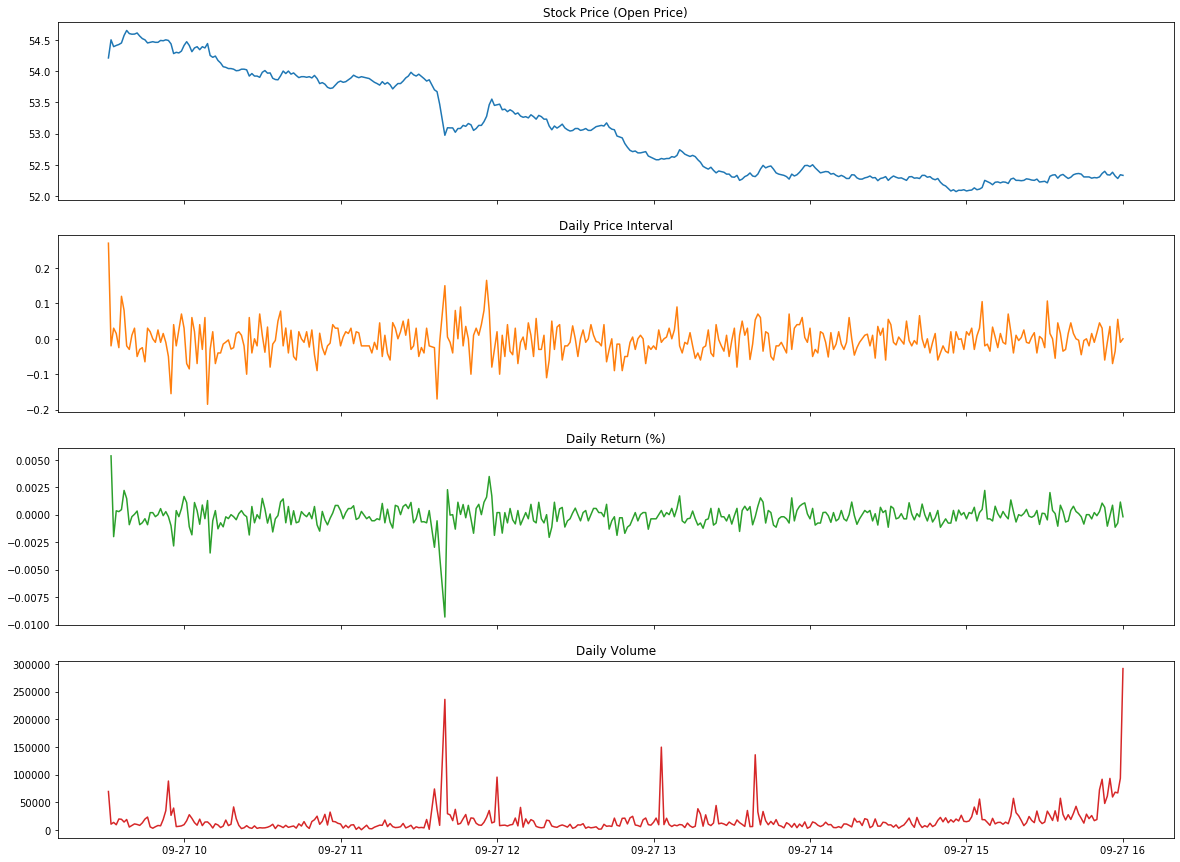

In [13]:
fig, axs = plt.subplots(4, sharex=True, figsize=(20, 15))

axs[0].plot(data['timestamp'], data['open'], 'tab:blue')
axs[0].set_title('Stock Price (Open Price)')

axs[1].plot(data['timestamp'], data['interval'], 'tab:orange')
axs[1].set_title('Daily Price Interval')

axs[2].plot(data['timestamp'], data['daily_return'], 'tab:green')
axs[2].set_title('Daily Return (%)')

axs[3].plot(data['timestamp'], data['volume'], 'tab:red')
axs[3].set_title('Daily Volume')